In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.5 MB/s eta 0:00:04
   -------------------- ------------------- 4.2/8.1 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [6]:
# Parametry
current_price = 120000
annual_growth_rate = 0.05
years = 5
annual_interest_rate = 0.12
monthly_interest_rate = annual_interest_rate / 12
months = years * 12

In [7]:
# Krok 1: Obliczenie orientacyjnej ceny mieszkania za 5 lat
future_price = current_price * (1 + annual_growth_rate) ** years
print(f"Orientacyjna cena mieszkania za 5 lat: {future_price:.2f} zł")

Orientacyjna cena mieszkania za 5 lat: 153153.79 zł


In [8]:
# Krok 2: Obliczenie miesięcznej wpłaty do banku
monthly_payment = npf.pmt(monthly_interest_rate, months, 0, -future_price)
print(f"Miesięczna wpłata do banku: {monthly_payment:.2f} zł")

Miesięczna wpłata do banku: 1875.28 zł


In [9]:
# Krok 3: Stworzenie wykresu
# Miesięczne zmiany ceny mieszkania
monthly_prices = current_price * (1 + annual_growth_rate / 12) ** np.arange(1, months + 1)

In [11]:
# Miesięczne zmiany wartości lokaty
monthly_deposits = np.zeros(months)
for i in range(1, months + 1):
        monthly_deposits[i - 1] = npf.fv(monthly_interest_rate, i, -monthly_payment, 0)

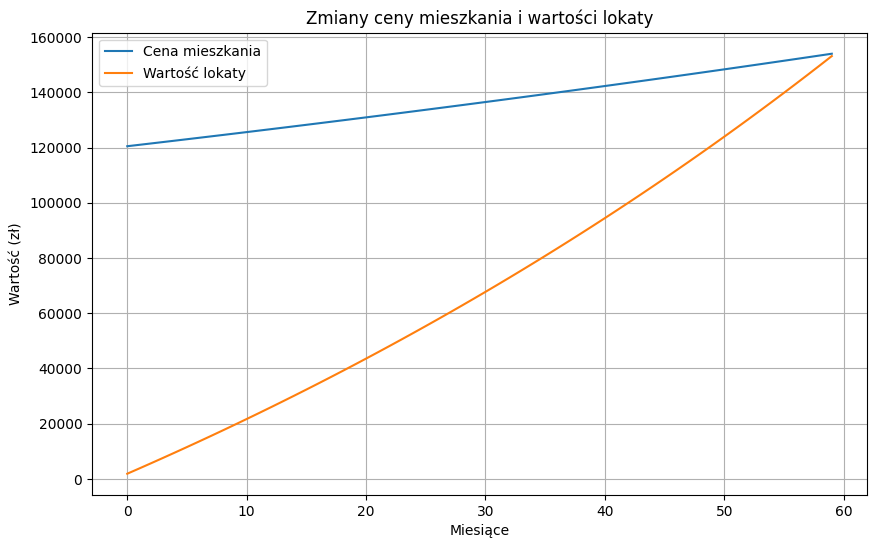

In [12]:
# Wykres
plt.figure(figsize=(10, 6))
plt.plot(monthly_prices, label='Cena mieszkania')
plt.plot(monthly_deposits, label='Wartość lokaty')
plt.xlabel('Miesiące')
plt.ylabel('Wartość (zł)')
plt.title('Zmiany ceny mieszkania i wartości lokaty')
plt.legend()
plt.grid(True)
plt.show()